In [1]:
%reload_ext autoreload

%load_ext autoreload
%autoreload 2
import torch

from shap_e.diffusion.sample import sample_latents, sample_latents_noised
# from shap_e.diffusion.gaussian_diffusion import ddim_inversion
from shap_e.diffusion.gaussian_diffusion import diffusion_from_config,GaussianDiffusion
from shap_e.models.download import load_model, load_config
from shap_e.util.notebooks import create_pan_cameras, decode_latent_images, gif_widget
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
xm = load_model('transmitter', device=device)
model = load_model('text300M', device=device)
diffusion = diffusion_from_config(load_config('diffusion'))
batch_size = 1
guidance_scale = 15.0
prompt = "a woman"

latents = sample_latents(
    batch_size=batch_size,
    model=model,
    diffusion=diffusion,
    guidance_scale=guidance_scale,
    model_kwargs=dict(texts=[prompt] * batch_size),
    progress=True,
    clip_denoised=True,
    use_fp16=True,
    use_karras=True,
    karras_steps=64,
    sigma_min=1e-3,
    sigma_max=160,
    s_churn=1,
)
if hasattr(model, "cached_model_kwargs"):
    model_kwargs = model.cached_model_kwargs(batch_size, dict(texts=[prompt] * batch_size))
pass



# latents_noised = diffusion.ddim_inversion(model=model,cond=model_kwargs['embeddings'],latent=latents,clip_denoised=True,model_kwargs=model_kwargs)
# print(latents_noised.shape)
# latents = ddim_inversion(latents,
                        #  model, diffusion, progress=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/yiftach/main/Research/shap-e/shap_e/examples/shap_e_model_cache
None is the location
None is the location


  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
# diffusion = GaussianDiffusion(betas = torch.linspace(0.0009,0.0120,1000),model_mean_type=diffusion.model_mean_type,model_var_type=diffusion.model_var_type,loss_type=diffusion.loss_type,discretized_t0=diffusion.discretized_t0,channel_scales=diffusion.channel_scales,channel_biases=diffusion.channel_biases)
latents_noised = diffusion.ddim_inversion(model=model,latent=latents,clip_denoised=True, model_kwargs=dict(texts=[prompt] * batch_size))


  0%|          | 0/1024 [00:00<?, ?it/s]

100%|██████████| 1024/1024 [00:32<00:00, 31.75it/s]


0it [00:00, ?it/s]

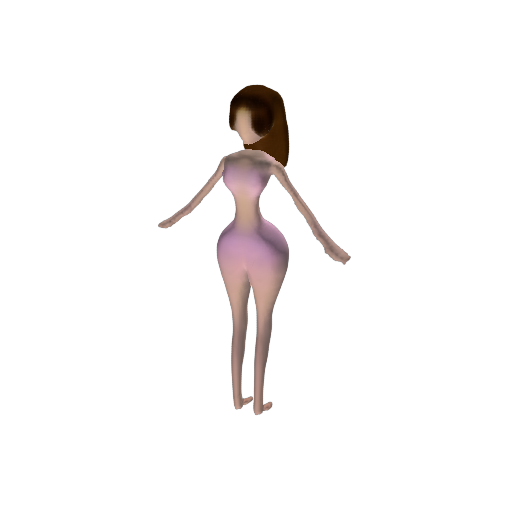

1it [00:01,  1.16s/it]


In [4]:
from PIL import Image
       # Example of saving the latents as meshes.
from shap_e.util.notebooks import decode_latent_mesh,create_custom_cameras
render_mode = 'stf' # you can change this to 'stf'
size = 512 # this is the size of the renders; higher values take longer to render.
from tqdm import tqdm
cameras = create_custom_cameras(size=size, device=device, azimuths=[30, 90, 150, 210, 270, 330], elevations=[20,-10]*3,fov_degrees=30)
# # latents_noised
# im = []
# print(latents[0][])
# mesh = decode_latent_mesh(xm,latents[0])
with torch.no_grad():
    for i, latent in tqdm(enumerate(latents[0])):
       # print(latent.shape)
       decoder_output = decode_latent_images(xm, latents[0].float(), cameras, rendering_mode='stf')
       arr = decoder_output.clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
       images = [Image.fromarray(x) for x in arr]
       import os
#         # print(latent)
       # decoder_output = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
       # arr = decoder_output.clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
#        images = [Image.fromarray(x) for x in arr]

#        im += images
       display(images[0])


In [23]:
import os
os.makedirs('woman',exist_ok=True)
for j,im in enumerate(images):
    print("a")
    im.save(f'woman/render_{j:04d}.png')

a
a
a
a
a
a


In [11]:
mesh = mesh.tri_mesh()

In [14]:
with open("orange_car.obj", 'w') as f:
    mesh.write_obj(f)

In [ ]:
diffusion = diffusion_from_config(load_config('diffusion'))
# diffusion.betas = diffusion.betas[:200]
diffusion.num_timesteps = 200
diffusion.alphas_cumprod = diffusion.alphas_cumprod[:200]
latents_new = sample_latents(
    batch_size=2,
    model=model,
    diffusion=diffusion,
    guidance_scale=guidance_scale,
    model_kwargs=dict(texts=["a coffee table"] * 2),
    progress=True,
    clip_denoised=True,
    use_fp16=True,
    use_karras=True,
    karras_steps=64,
    sigma_min=1e-3,
    sigma_max=160,
    s_churn=0,
    noise=torch.cat((latents_noised[200],latents_noised[200]),dim=0)
)

                        # Example of saving the latents as meshes.


  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
from shap_e.util.notebooks import decode_latent_mesh
render_mode = 'nerf' # you can change this to 'stf'
size = 256 # this is the size of the renders; higher values take longer to render.
from tqdm import tqdm
cameras = create_pan_cameras(size, device)
# latents_noised
im = []
for i, latent in tqdm(enumerate(latents_new[:2])):
    images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    im += images
    display(gif_widget(images))
    

0it [00:00, ?it/s]

HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAAFk9KVk9KFg9Klg9KVk8KFg8KVg8KFc8KVc8KFY8KVc7KFc7J1…

1it [00:41, 41.09s/it]

HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAAFk9KVk9KFg9Klg9KVk8KFg8KVg8KFc8KVc8KFY8KVc7KFc7J1…

2it [01:22, 41.34s/it]


In [ ]:
                        # Example of saving the latents as meshes.
from shap_e.util.notebooks import decode_latent_mesh
render_mode = 'nerf' # you can change this to 'stf'
size = 128 # this is the size of the renders; higher values take longer to render.
from tqdm import tqdm
cameras = create_pan_cameras(size, device)
# latents_noised
im = []
for i, latent in tqdm(enumerate(latents_noised[1022:])):
    print(latent)
    images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    im += images
    display(gif_widget(images))
    


In [ ]:
import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html


Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu121_pyt210/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 66.8 MB/s eta 0:00:00a 0:00:01


In [ ]:
size = 128 # this is the size of the renders; higher values take longer to render.
cameras = create_pan_cameras(size, device)
# latents_noised
im2 = []
for i, l2 in tqdm(enumerate(latents_new)):
    images = decode_latent_images(xm, l2, cameras, rendering_mode="nerf")
    display(gif_widget(images))
    

In [ ]:
im2[0][0]

In [ ]:
im[0][0]


In [ ]:
xm = load_model('transmitter', device=device)


In [ ]:
latents_new,latents,latents_noised[200]

In [ ]:
diffusion = diffusion_from_config(load_config('diffusion'))
batch_size = 1
guidance_scale = 15.0
prompt = "a panda"

latents = sample_latents(
    batch_size=batch_size,
    model=model,
    diffusion=diffusion,
    guidance_scale=guidance_scale,
    model_kwargs=dict(texts=[prompt] * batch_size),
    progress=True,
    clip_denoised=True,
    use_fp16=True,
    use_karras=True,
    karras_steps=64,
    sigma_min=1e-3,
    sigma_max=160,
    s_churn=0,
)
